In [30]:
% matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import netCDF4
from scipy import optimize

import romspy
import seasonal

In [31]:
ncfile = '/home/okada/ism-i/apps/OB500P/param_v1/NL1/ob500_his_0001.nc'
grdfile = '/home/okada/Data/ob500_grd-11_3.nc'
mapfile = '/home/okada/romspy/romspy/deg_OsakaBayMap_okada.bln'

nc = romspy.hview.Dataset(ncfile, grdfile, mapfile)

nc.check_time()

check_time(which=ends, name=ocean_time, tunit=seconds since 1968-05-23 09:00:00 GMT)
2012-01-01 00:00:00 0
2012-02-01 00:00:00 31


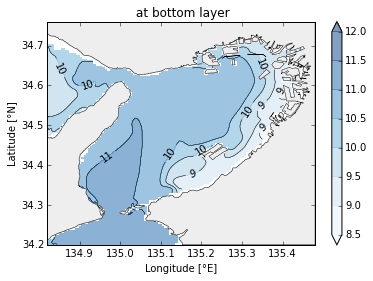

In [32]:
nc.sview('temp', t=31, k=0)

In [34]:
k = 19
fname = 'roms_std'
freq = 5
    
var = nc.nc['temp'][:,k,:,:]
tmax, jmax, imax = var.shape
time = np.arange(tmax)

temp_std = np.zeros((jmax,imax))
for i in range(imax):
    j = 2
    obs_value = var[:,j,i]
    if obs_value[-1] < 1000:
        print i, j, obs_value[-1]
        xs = seasonal.main(obs_value, time, time, fname, freq)
        t = xs[:,0]
        x = obs_value - t
        std = np.std(x)
        temp_std[j,i] = std

0 2 9.96507
roms_std
         Current function value: 4368.336825
         Iterations: 7
         Function evaluations: 167
         Gradient evaluations: 37
a, b, sigma2, logL = 472.062405604 189.36912815 0.00049546901037 3892.68668538
1 2 10.008
roms_std
         Current function value: 4238.502848
         Iterations: 1
         Function evaluations: 92
         Gradient evaluations: 20
a, b, sigma2, logL = 362.343139648 387.25579834 0.000565050407163 3825.39747777
2 2 10.7609
roms_std
         Current function value: 4654.862954
         Iterations: 3
         Function evaluations: 90
         Gradient evaluations: 19
a, b, sigma2, logL = 361.708801238 409.61932376 0.000138773525629 4544.28545369
3 2 11.133
roms_std
         Current function value: 4121.462565
         Iterations: 6
         Function evaluations: 215
         Gradient evaluations: 51
a, b, sigma2, logL = 440.187352857 478.244948957 0.000436211070861 3957.96509875
4 2 11.2874
roms_std
         Current function value

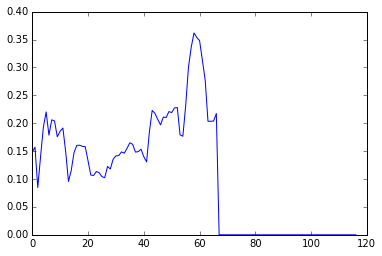

In [35]:
plt.plot(temp_std[2,:])